In [3]:
pip install ucimlrepo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [6]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [7]:
len(X.columns)

16

In [8]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [9]:
y.value_counts()

y  
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
bank_marketing.variables.style.set_properties(subset=['description'], **{'width': '500px'})

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,"contact communication type (categorical: 'cellular','telephone')",None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [11]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Seeing the summary, we can see that mean age of client is about 41 years, avg balance is 1362, but std deviation is also high, so there is lot of disparity in balance which is not surprising. As described in data, the duration is highly correlated with target variable, also duration is only obtained after we call the client. When predicting, we would not have called the client and wouldn't know the value of this variable. Hence, it is better to drop this feature for correct prediction. If we see clearly, all the quantitative data has no missing values which is a good thing for us.



C:\Users\nisar\AppData\Local\Temp\ipykernel_24980\232420686.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


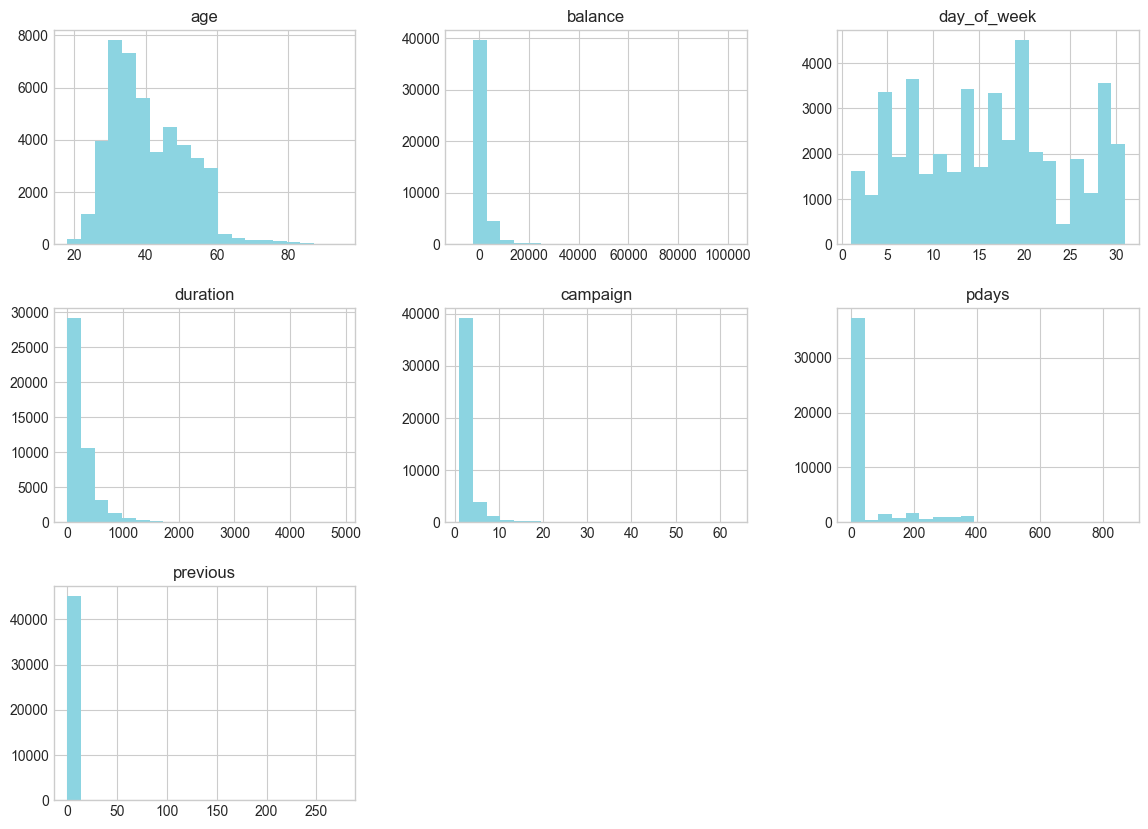

In [13]:
#numeric data histplots
plt.style.use('seaborn-whitegrid')
X.hist(bins=20, figsize=(14,10), color='#8CD4E1')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

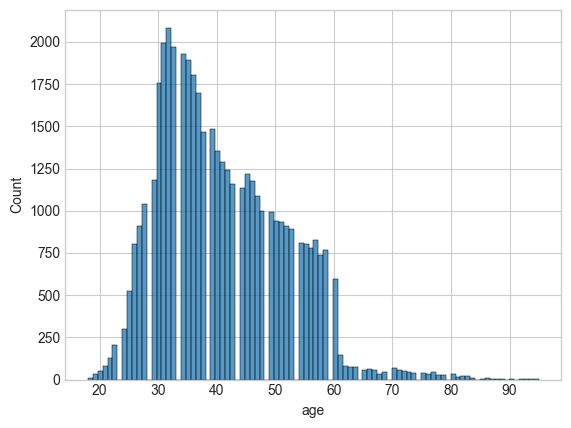

In [14]:
#age
sns.histplot(X, x = 'age')

We can see that age is right skewed, therefore mean is 41, and median is 39

(0.0, 3000.0)

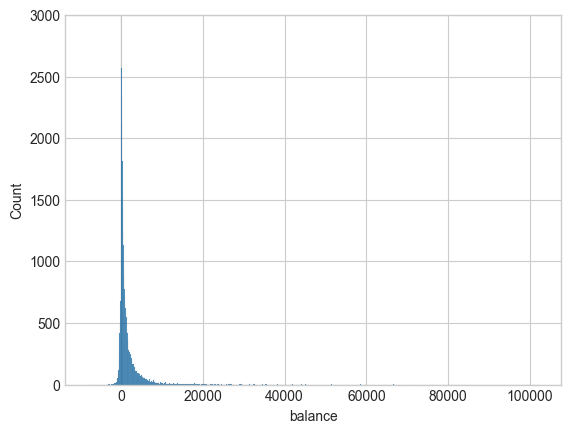

In [15]:
#balance
bal = sns.histplot(X, x = 'balance')
bal.set_ylim(0, 3000)

This does not give us any information, its better if we plot a box plot.

<Axes: ylabel='balance'>

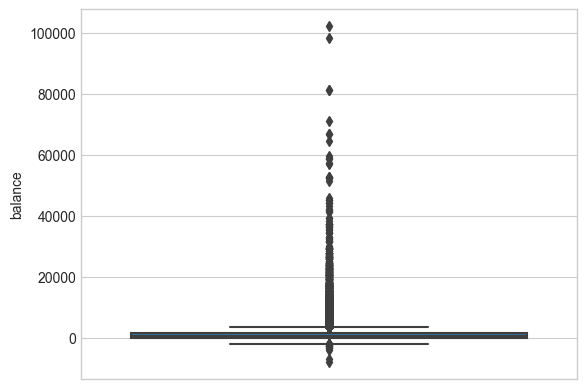

In [16]:
sns.boxplot(y = 'balance', data = X)

<Axes: ylabel='balance'>

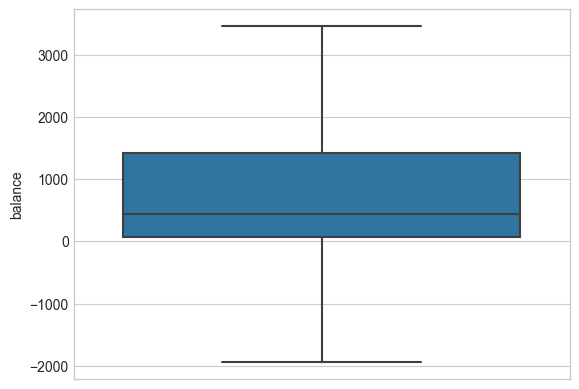

In [17]:
#removing outliers and seeing
sns.boxplot(y = 'balance', data = X, showfliers = False)

This shows that even most of the balance is less than 500 for most of the clients. The mean was inflated because of outliers.

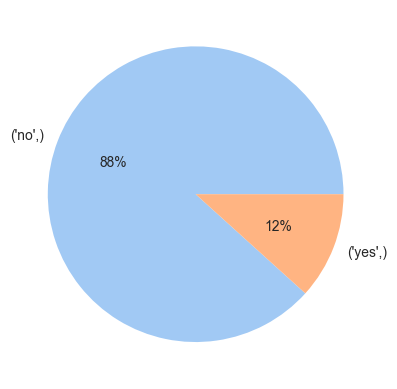

In [18]:

colors = sns.color_palette('pastel')
#create pie chart
plt.pie(y.value_counts(), labels = y.value_counts().index, colors = colors,autopct='%1.0f%%')
plt.show()

Text(0.5, 1.0, 'Type of Work by Term Suscriptions')

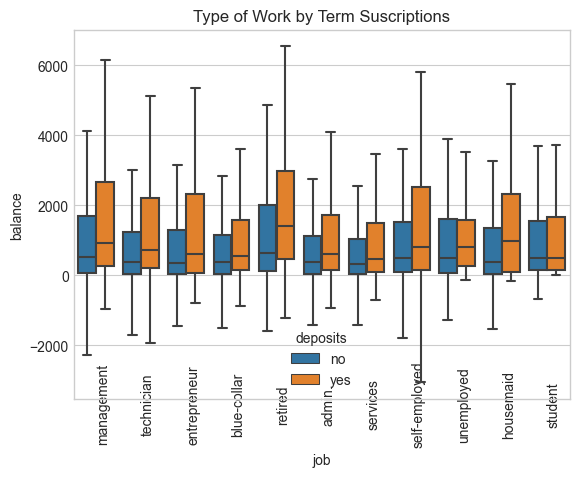

In [19]:
#balance wrt to job position of the client
df = X.copy()
df['deposits'] = y
# plt.figure(figsize=(16,12))
j = sns.boxplot(x="job", y="balance", hue='deposits',
                 data=df,showfliers =False)
# j.set_xticks(df['job'].unique())
j.set_xticklabels(df["job"].dropna().unique(), rotation=90, rotation_mode="anchor")
j.set_title("Type of Work by Term Suscriptions")


Text(0.5, 1.0, 'Amount of Balance by Term Suscriptions')

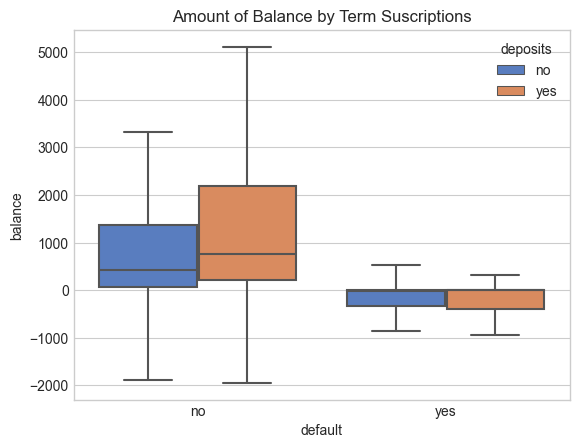

In [20]:
# plt.figure(figsize=(8,8))
g = sns.boxplot(x="default", y="balance", hue="deposits",
                    data=df, palette="muted",showfliers = False)

g.set_title("Amount of Balance by Term Suscriptions")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'Unknown')])

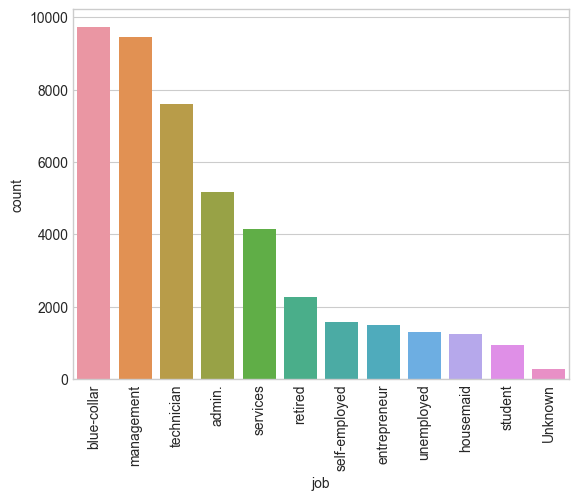

In [21]:
#occupational analysis
plt.clf()
# plt.figure(figsize=(6.4,4.8))
df["job"].fillna("Unknown", inplace=True)
sns.countplot(x='job' , data =df,order=df["job"].value_counts().index,)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

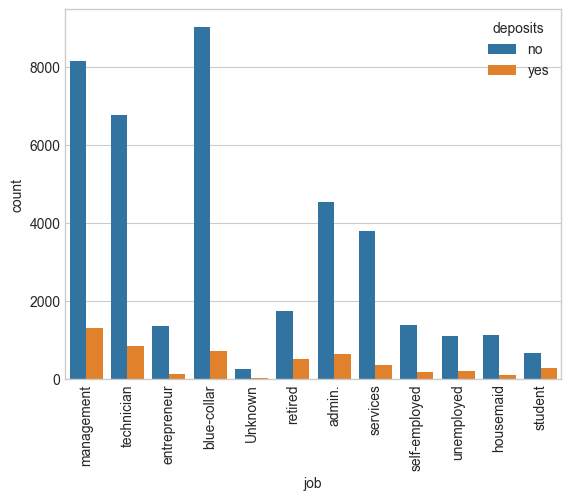

In [22]:
#we see out of all job, what amount of people have opened a deposit or not
#occupational analysis
# plt.figure(figsize=(10,8))
sns.countplot(x='job',hue='deposits' , data =df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'student'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'unemployed'),
  Text(3, 0, 'management'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'technician'),
  Text(8, 0, 'services'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'blue-collar')])

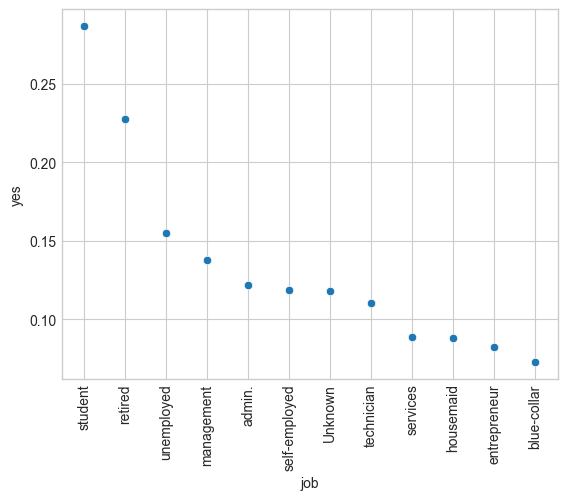

In [23]:
#creating percentage of yes deposits based on jobs
# Create a contingency table (cross-tabulation)
ct = pd.crosstab(df['job'], df['deposits'], normalize='index')
ct = ct.sort_values(by=['yes'], ascending = False)
sns.scatterplot(x = ct.index, y = ct.yes)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'student'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'unemployed'),
  Text(3, 0, 'management'),
  Text(4, 0, 'admin.'),
  Text(5, 0, 'self-employed'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'technician'),
  Text(8, 0, 'services'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'blue-collar')])

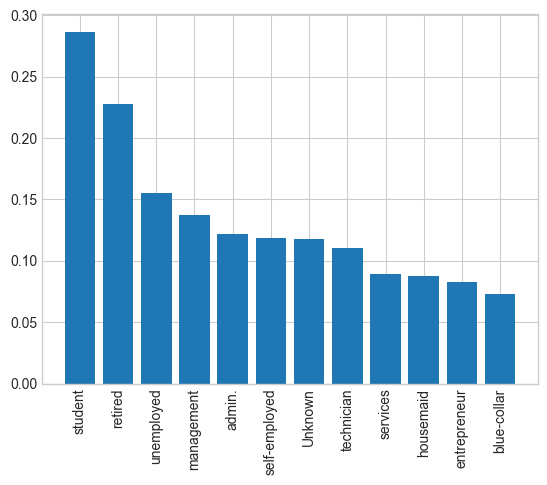

In [24]:
plt.bar(ct.index, ct.yes)
plt.xticks(rotation = 90)

We see that student, retired, management and admin have higher percentage of term deposits.

In [25]:
#effect of marital Status
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [26]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [27]:
df['marital'].value_counts().tolist()

[27214, 12790, 5207]

<BarContainer object of 3 artists>

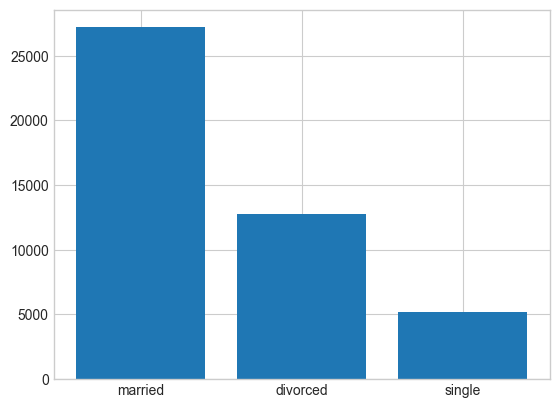

In [28]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

plt.bar(labels, vals)

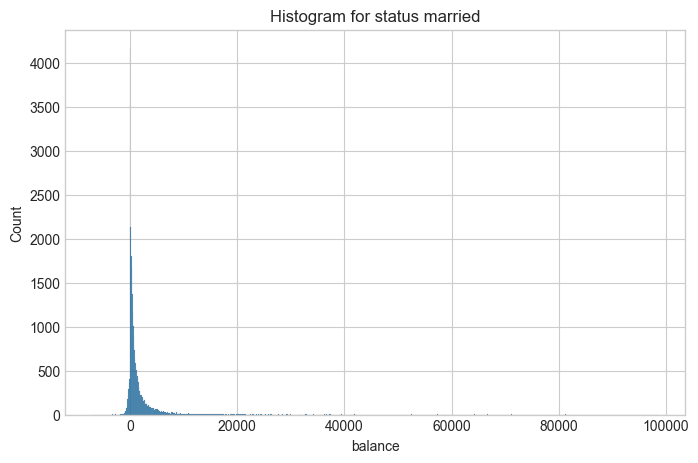

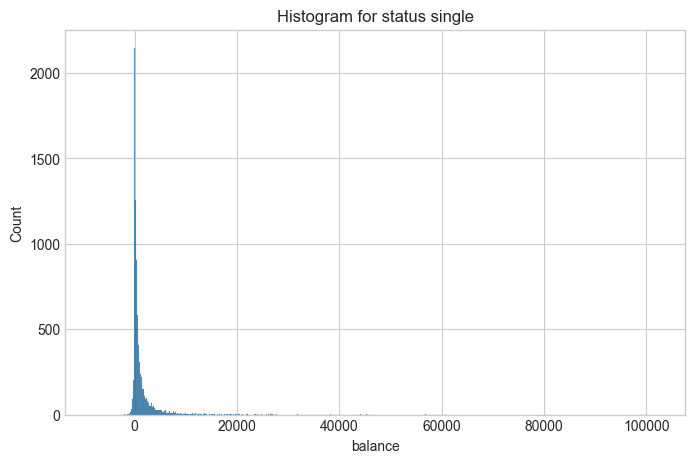

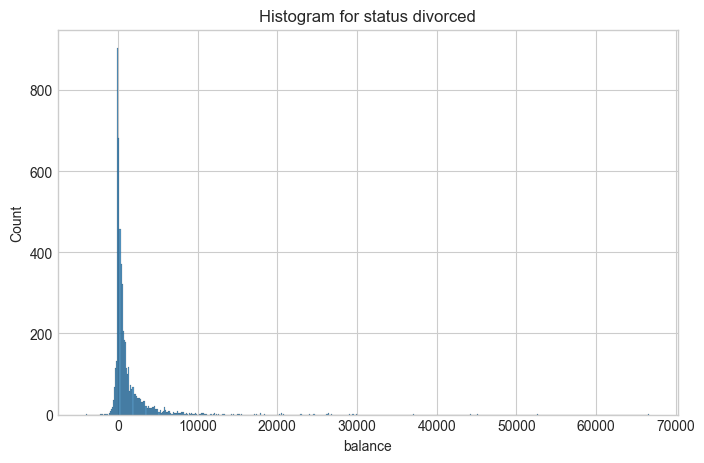

In [29]:
#we try to find hist plot of balance of each marital status
# Create separate histograms for each category
#plt.figure(figsize=(10, 6))

for category in df["marital"].unique():
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sns.histplot(df[df["marital"] == category]["balance"])
    plt.xlabel('balance')
    plt.ylabel('Count')
    plt.title(f'Histogram for status {category}')
    plt.show()


Balances are much much lower for the divorced category

c:\Users\nisar\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


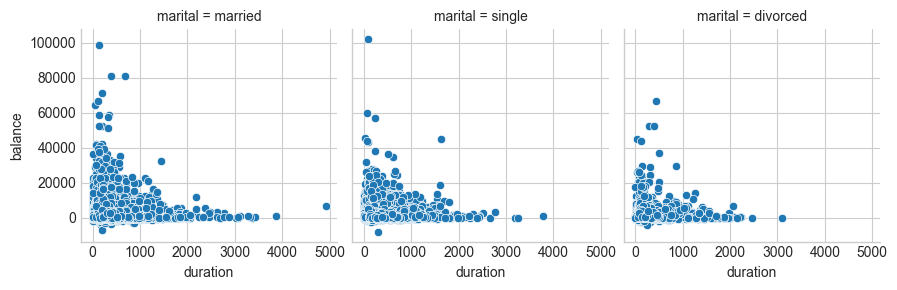

In [30]:
# Create a FacetGrid
facet_grid = sns.FacetGrid(data=df, col="marital")  # margin_titles=True

# Map scatterplots to the grid
facet_grid.map(sns.scatterplot, 'duration', 'balance')

# Customize the subplots
facet_grid.set_axis_labels("duration", "balance")

# Display the FacetGrid
plt.show()


In [31]:
#we find clients with high balances that did not open a term deposit
plt.figure(figsize=(10, 6))
facet_grid = sns.FacetGrid(data=df, col="balance", row = 'marital', hue='deposits')


# Display the FacetGrid
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001AE8D3230A0> (for post_execute):


ValueError: Image size of 2150400x900 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 0 Axes>

ValueError: Image size of 2150400x900 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2.1504e+06x900 with 862 Axes>

In [ ]:
facet_grid = sns.FacetGrid(data=df, col="marital")  # margin_titles=True

# Map scatterplots to the grid
facet_grid.map(sns.scatterplot, 'deposits', 'balance')

# Customize the subplots
facet_grid.set_axis_labels("deposits", "balance")

# Display the FacetGrid
plt.show()


In [ ]:
# # Notice how divorced have a considerably low amount of balance.
plt.figure(figsize=(10, 7.5))
# sns.FacetGrid(
#     df,
#     row='duration',
#     col='balance',
#     hue='marital'
# )
g = sns.FacetGrid(df, hue="marital")
g.map_dataframe(sns.scatterplot, x="duration", y="balance")
g.add_legend()
plt.show()


In [ ]:
#lets see relationship with various variables:

# Select specific variables for the pairplot
selected_variables = ["age", "job", 'marital','education', 'default', 'balance', 'deposits', 'housing','loan','duration']

# Create a pairplot with selected variables
sns.pairplot(df[selected_variables])

# Show the pairplot
plt.show()


In [ ]:
df.columns